In [136]:

from pandas import  *
from numpy import *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [137]:
df=read_csv('BTC_USDT Historical Data.csv')

In [138]:
df.head()

Date     Price      Open      High       Low Change %
0  Sep 20, 2021  43,810.8  47,233.1  47,321.3  43,281.6   -7.25%
1  Sep 19, 2021  47,233.1  48,293.7  48,352.2  46,800.0   -2.20%
2  Sep 18, 2021  48,293.7  47,274.4  48,775.0  47,064.5    2.16%
3  Sep 17, 2021  47,274.4  47,753.8  48,139.2  46,793.8   -1.00%
4  Sep 16, 2021  47,753.8  48,124.6  48,467.1  47,029.3   -0.77%

In [139]:
df.describe()

Date     Price      Open      High       Low Change %
count             30        30        30        30        30       30
unique            30        30        30        30        30       30
top     Sep 20, 2021  43,810.8  47,233.1  47,321.3  43,281.6   -7.25%
freq               1         1         1         1         1        1

FOLLOW THESE STEPS FOR Data Acquisition:
1.  Set 'Date' as the index for time-series data as - 
df['Date'] = to_datetime(df['Date'])
2. Convert numeric columns to float
3. Adjust date as per ques.
4. Display the preprocessed data


In [140]:
df['Date'] =to_datetime(df['Date'], format='%b %d, %Y')

df.set_index('Date', inplace=True)
numeric_cols = ['Price', 'Open', 'High', 'Low']
df[numeric_cols] = df[numeric_cols].replace({',': ''}, regex=True).astype(float)

df['Change %'] = df['Change %'].str.rstrip('%').astype('float') / 100.0
start_date = '2018-01-01'
end_date = '2022-01-31'
new_data = df.loc[start_date:end_date]
new_data

C:\Users\debna\AppData\Local\Temp\ipykernel_15712\3577371450.py:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  new_data = df.loc[start_date:end_date]


Price     Open     High      Low  Change %
Date                                                    
2021-09-20  43810.8  47233.1  47321.3  43281.6   -0.0725
2021-09-19  47233.1  48293.7  48352.2  46800.0   -0.0220
2021-09-18  48293.7  47274.4  48775.0  47064.5    0.0216
2021-09-17  47274.4  47753.8  48139.2  46793.8   -0.0100
2021-09-16  47753.8  48124.6  48467.1  47029.3   -0.0077
2021-09-15  48124.6  47077.9  48411.8  46729.5    0.0222
2021-09-14  47077.9  44932.6  47210.4  44678.6    0.0477
2021-09-13  44932.6  46040.9  46829.8  43413.1   -0.0243
2021-09-12  46053.6  45153.2  46400.0  44742.0    0.0199
2021-09-11  45153.2  44850.7  45962.0  44736.7    0.0067
2021-09-10  44850.7  46359.8  47035.4  44201.0   -0.0326
2021-09-09  46359.8  46059.3  47397.2  45526.9    0.0065
2021-09-08  46059.3  46846.5  47316.6  44459.5   -0.0167
2021-09-07  46839.3  52656.2  52881.6  43002.9   -0.1105
2021-09-06  52656.2  51764.7  52741.5  50990.8    0.0172
2021-09-05  51764.7  49909.6  51879.9  49485.0    0.0372
2021-09-04  49909.6  49997.0  50520.7  49401.8   -0.0017
2021-09-03  49997.0  49253.3  50985.0  48338.9    0.0151
2021-09-02  49253.3  48835.5  50366.8  48597.1    0.0086
2021-09-01  48835.5  47124.1  49126.3  46533.4    0.0363
2021-08-31  47124.1  46966.9  48180.8  46709.2    0.0033
2021-08-30  46966.9  48771.6  48883.5  46875.0   -0.0370
2021-08-29  48771.6  48882.0  49589.5  47802.6   -0.0023
2021-08-28  48882.0  49039.5  49263.2  48375.0   -0.0032
2021-08-27  49039.5  46857.4  49116.4  46375.2    0.0466
2021-08-26  46857.4  48979.1  49330.0  46297.2   -0.0433
2021-08-25  48979.1  47688.2  49221.1  47149.6    0.0271
2021-08-24  47688.2  49518.1  49838.0  47630.0   -0.0373
2021-08-23  49534.5  49280.8  50460.4  49055.4    0.0051
2021-08-22  49280.8  48830.6  49466.1  48056.6    0.1249

STEPS FOR Data Preprocessing:
1. Let 'filtered_data' is the DataFrame obtained from the previous code
2.  Handle missing data (replace NaN with forward fill)
3. Perform any necessary data transformations.
4. Ensure the DataFrame is sorted by date


In [141]:
new_data.fillna(method='ffill', inplace=True)


new_data.sort_index(inplace=True)
new_data['Daily_Return'] = new_data['Price'].pct_change()
new_data.tail()


Price     Open     High      Low  Change %  Daily_Return
Date                                                                  
2021-09-16  47753.8  48124.6  48467.1  47029.3   -0.0077     -0.007705
2021-09-17  47274.4  47753.8  48139.2  46793.8   -0.0100     -0.010039
2021-09-18  48293.7  47274.4  48775.0  47064.5    0.0216      0.021561
2021-09-19  47233.1  48293.7  48352.2  46800.0   -0.0220     -0.021961
2021-09-20  43810.8  47233.1  47321.3  43281.6   -0.0725     -0.072456

STEPS FOR IMPLEMENTING REGRESSION MODELS TO FORECAST THE DATA-
1. We have used SVR and LINEAR REGRESSION 
2. Import required modules and packages
3. Select features and target variable
4. Split the data into training and testing sets
5. Fit the models for training sets  
6. Find accuracy of the model in training sets and test sets


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [143]:
features = ['Open', 'High', 'Low', 'Change %']
target = 'Price'


X_train, X_test, y_train, y_test = train_test_split(new_data[features], new_data[target], test_size=0.2, random_state=42)


In [144]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


#using kernel - linear
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)


SVR(kernel='linear')

In [145]:
# Predictions
linear_predictions = linear_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

In [146]:
#training accuracy for linear  regression model
linear_model.score(X_train,y_train)

0.9730883963189069

In [147]:
#testing accuracy for linear  regression model
linear_model.score(X_test,y_test)

0.9674699238830844

In [148]:
#training accuracy for SVR model
svm_model.score(X_train,y_train)

0.923945592968028

In [149]:
#testing accuracy for SVR model
svm_model.score(X_test,y_test)

0.921146271658469

So, we have descent accuracy (>90%) for both the models.
  Here, Linear Regression model is performing better than SVR model

In [150]:
# Plot actual vs predicted prices for Linear Regression
figure(figsize=(12, 6))
plot(y_test.index, y_test.values, label='Actual Prices', marker='o')
plot(y_test.index, linear_predictions, label='Linear Regression Prediction', marker='o')
title('BTC/USDT - Linear Regression Prediction')
xlabel('Date')
ylabel('Price')
legend()
show()

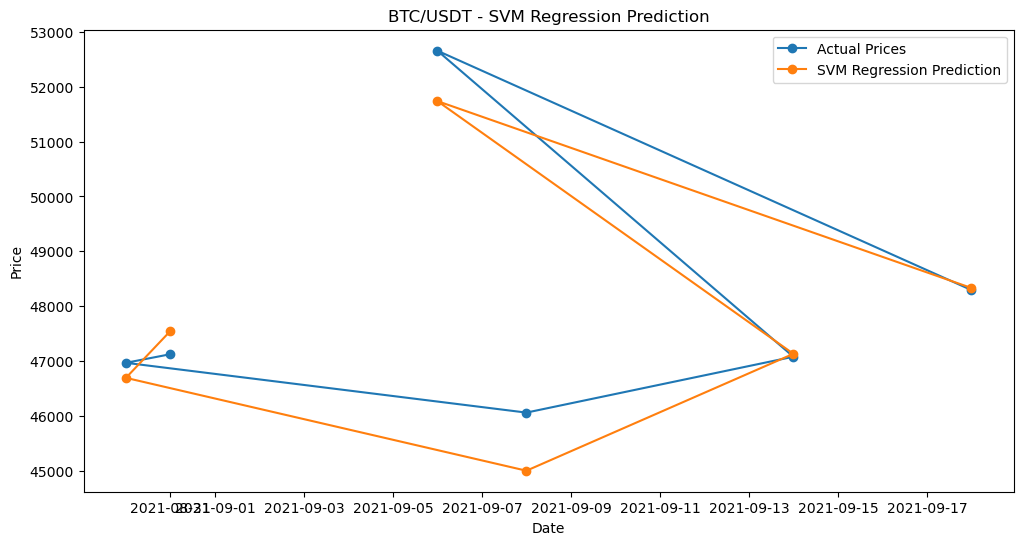

In [151]:
# Plot actual vs predicted prices for SVM Regression
figure(figsize=(12, 6))
plot(y_test.index, y_test.values, label='Actual Prices', marker='o')
plot(y_test.index, svm_predictions, label='SVM Regression Prediction', marker='o')
title('BTC/USDT - SVM Regression Prediction')
xlabel('Date')
ylabel('Price')
legend()
show()

STEPS - 
1.   Let 'new_data' is the DataFrame obtained from the previous code
and 'Price' is the column to be forecasted.
2.  Convert the 'Date' index to datetime
3.  Resample the data to daily frequency (if not already in daily frequency)
4.  Plot ACF and PACF to determine the order of ARIMA(p, d, q)
5.  Fit ARIMA model
6.  Example order, adjust based on ACF and PACF plots
7.  Forecast future prices and adjust forecast step accordingly.


In [152]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [153]:
new_data.index = to_datetime(new_data.index)
daily_data = new_data['Price'].resample('D').mean().dropna()

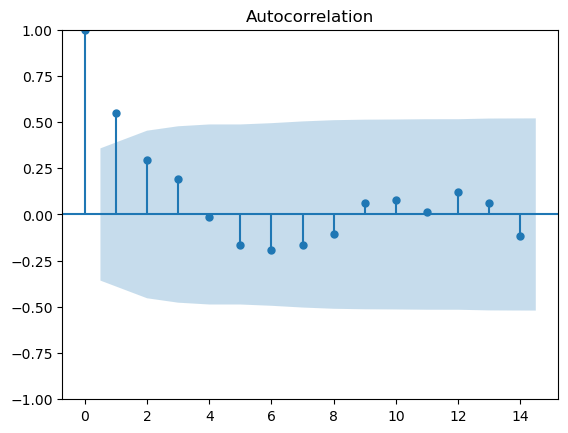

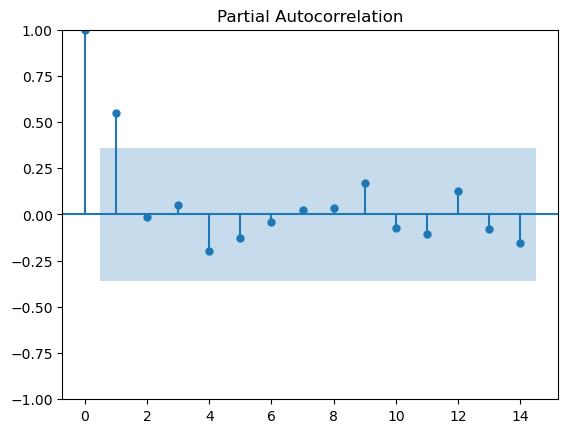

In [154]:
plot_acf(daily_data, lags=14)
plot_pacf(daily_data, lags=14)
show()

In [155]:
p, d, q = 1, 1, 1  
arima_model = ARIMA(daily_data, order=(p, d, q))
arima_results = arima_model.fit()

In [156]:
forecast_steps = 30  
forecast = arima_results.get_forecast(steps=forecast_steps)

In [157]:
# Plot the results
figure(figsize=(12, 6))
plot(daily_data.index, daily_data.values, label='Actual Prices', marker='o')
plot(forecast.predicted_mean.index, forecast.predicted_mean.values, label='ARIMA Forecast', color='red', marker='o')
title('BTC/USDT - ARIMA Forecast')
xlabel('Date')
ylabel('Price')
legend()
show()